
# Attribute and Description

## Car Make

#### The make of the car, which represents the brand or company that produced the car. Examples of car makes in this dataset include Porsche, Lamborghini, Ferrari, Audi, and McLaren.

## Car Model

#### The model of the sports car, which represents the specific version or variant of the car produced by the manufacturer. Examples of car models in this dataset include 911, Huracan, 488 GTB, R8, 720S, M8, AMG GT, Corvette, Mustang Shelby GT500, and GT-R Nismo.

## Year

#### The year of production of the sports car, which indicates the model year when the car was first introduced or made available for purchase.

## Engine Size (L)

#### The size of the sports car's engine in liters, which represents the volume of the engine's cylinders. A larger engine size typically indicates higher power and performance. Engine sizes in this dataset range from 2.0L to 8.0L, with some cars having electric motors instead.

## Horsepower

#### The horsepower of the sports car, which represents the power output of the car's engine. Higher horsepower typically indicates faster acceleration and higher top speed. Horsepower values in this dataset range from 300 to 1479.

## Torque (lb-ft)

#### The torque of the sports car in pound-feet, which represents the rotational force generated by the engine. Higher torque values typically indicate stronger acceleration and better handling. Torque values in this dataset range from 270 to 1180.

## 0-60 MPH Time (seconds)

#### The time it takes for the sports car to accelerate from 0 to 60 miles per hour, which is a common measure of acceleration and performance. Lower 0-60 MPH times typically indicate faster acceleration and better performance. 0-60 MPH times in this dataset range from 1.85 to 5.3 seconds.

## Price (in USD)

#### The price of the sports car in US dollars, which represents the cost of purchasing the car. Prices in this dataset range from $25,000 to $3,000,000.

# Assignment 2 Overview

### General Tasks

1. Clean irregularities in the raw data file to convert it into a proper CVS format.
1. Read data from the cleaned CVS file into a Pandas Data frame.
1. Convert between different Date/time formats.
1. Filter/restrict the rows and columns in Pandas Data frames to help answer the queries.
1. Use aggregation operations (such as mean, median, sum, max) and to summarize data.
1. Use group by to summarize data for various categories.
1. Create new columns that are computed based on other existing columns.
1. Demonstrate appropriate use of a variety of types of Plots to visualize data (using Pandas).
1. All plots should have meaningful titles, axes labels and user-friendly data labels and be scaled large enough to easy see the details required.
1. Markdown headings should be added to clearly separate and explain each of the tasks and markdown should be provided to discuss/summarize the key observations.
1. Don’t repeat yourself – use functions to avoid duplicating the same logic in multiple places.
1. Use programming best practice – write clear simple Python code and use well-chosen identified names for all variables and functions.

### Specific Tasks

1. Use markdown to document any checks on the data to ensure that the data is clean. Hint: Running consistency checks is good practice before working with data sets.
1. Read the clean CSV file into a Pandas data frame
1. Determine the car with the maximum Engine Size and print the Make, Model and Year of that car
1. Determine the average car price of all cars in the dataset
1. Add a column that shows the price per Horsepower of each car
1. Show a bar chart with the 10 fastest cars in order using the 0-60mph value as criteria
1. Plot a histogram of engine sizes in the dataset, binning to full liters 
1. Show the relation of Engine size vs Torque in a scatterplot
1. Make a table of all cars where the model starts with the letter 'A'
1. Plot the torque of each electric car in ascending order

In [1]:
import pandas
import math

cars = pandas.read_csv("data-2.csv")

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [3]:
# Analysing the initial data it should be expected that Engine Size, Horsepower, Torque, 0-60 MPH Time, and Price are of type int. Therefore these columns must be cleaned.

**Engine Size Cleaning**

In [4]:
# These data points have been converted to type str due to presence of non numeric data

cars['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [5]:
# The only value that does not have a clear numeric value is the 'Hybrid'...

cars[cars['Engine Size (L)'] == 'Hybrid']

# ... from which this code identifies which models obtain this value

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
732,BMW,i8,2022,Hybrid,369,184,4.2,"148,500"
967,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid,689,642,3,"190,000"


In [6]:
cars[(cars['Car Model'] == 'Panamera Turbo S E-Hybrid') | (cars['Car Model'] == 'i8')]

# Through this code it is found that the i8 has an engine size of 1.5 and the Panamera 4.0

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
42,BMW,i8,2020,1.5 + Electric,369,420,4.2,"148,500"
116,Porsche,Panamera Turbo S E-Hybrid,2021,4,690,642,3.2,"190,000"
626,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid (4.0),690,641,3,"186,350"
715,BMW,i8,2022,1.5,369,184,4.2,"147,500"
732,BMW,i8,2022,Hybrid,369,184,4.2,"148,500"
762,Porsche,Panamera Turbo S E-Hybrid,2021,4,690,642,3,"190,000"
789,Porsche,Panamera Turbo S E-Hybrid,2021,4,689,642,3,"190,000"
841,BMW,i8,2022,1.5,369,184,4.2,"147,500"
967,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid,689,642,3,"190,000"


In [7]:
# All purely electric cars should be nan, that is points Electric, Electric (tri-motor), Electric motor, Electric (93 kWh) and Electric (100 kWh). 
# The rest are hybrid which will have a numeric value.
# Out of the hybrid conditions '2.0 (Electric)', '4.0 (Hybrid)', 'Hybrid (4.0), and '1.5 + Electric', have their numeric values throughout the string.
# While the 'Hybrid' values are incompatible with the converter function and have to be directly converted. This was completed and saved to the data-2 modified csv file.
def converter_engine_size(str):
    try:
        return float(str)
    except:
        if str == 'Electric' or str == 'Electric (tri-motor)' or str == 'Electric motor' or str == 'Electric (93 kWh)' or str == 'Electric (100 kWh)':
            return math.nan
        elif str == '1.5 + Electric' or str == '2.0 (Electric)' or str == '4.0 (Hybrid)':
            return float(str[:2])
        elif str == 'Hybrid (4.0)':
            return float(str[8:11])
        

        

**Price Cleaning**

In [8]:
# Prices are made a string by the presence of a comma, hence the following function aims to remove this

def converter_price(str):
    try:
        return float(str)
    except:
        return float(str.replace(',',''))

**Horsepower Cleaning**

In [9]:
cars.Horsepower.unique()

array(['379', '630', '661', '562', '710', '617', '523', '490', '760',
       '600', '1500', '717', '296', '1280', '471', '416', '454', '300',
       '505', '320', '626', '671', '622', '720', '1914', '414', '759',
       '986', '591', '503', '650', '660', '350', '641', '611', '394',
       '612', '369', '603', '455', '460', '325', '349', '592', '444',
       '405', '797', '770', '332', '473', '480', '573', '380', '1600',
       '181', '620', '764', '624', '1000+', '382', '800', '715', '690',
       '730', '469', '365', '401', '645', '435', '1020', '500', '780',
       '750', '402', '575', '729', '789', '577', '495', '237', '310',
       '791', '1874', '542', '368', '616', '1479', '755', '1,000+', '288',
       '1888', '10000+', '482', '1973', '1262', '1035', '819', '385',
       '647', '1200', '1578', '625', '583', '429', '563', '400', '707',
       '887', '1972', '305', '640', '255', '689', '372', '1000', '2000',
       '550', '10,000', '1,500', '10,000+', '485', '1,020', '1872', '621'

In [10]:
# Horsepower has values that contain + and , symbols so these must be replaced

def converter_horsepower(str):
    new_value = str
    try:
        return float(new_value)

    except:
        for i in str:
            if i == ',':
                new_value = new_value.replace(',','')
            elif i == '+':
                new_value = new_value.replace('+', '')
        return float(new_value)

            

In [11]:
converter_horsepower('+10,000')

10000.0

**Torque Cleaning**

In [12]:
cars['Torque (lb-ft)'].unique()

array(['331', '443', '561', '406', '568', '553', '494', '465', '625',
       '481', '516', '1180', '656', '295', '1015', '398', '317', '384',
       '280', '243', '664', '531', '468', '737', '738', '1696', '309',
       '590', '479', '650', '550', '276', '626', '369', '420', '627',
       '455', '505', '560', '457', '707', '270', '354', '476', '339',
       '1106', '151', '605', '368', '723', '642', '509', '604', '507',
       '513', '600', '440', '1050', '708', '774', '254', '663', '332',
       '530', '470', '258', '290', '413', '1732', '376', '-', '10,000+',
       '236', '0', '472', '1254', '848', '1300', '442', '641', '498',
       '350', nan, '944', '268', '184', '400', '263', '7,376', '1,180',
       '475', '1,050', '740', '538'], dtype=object)

In [13]:

def converter_torque(str):
    new_value = str
    try:
        for i in str:
            if i == ',':
                new_value = new_value.replace(',','')
            elif i == '+':
                new_value = new_value.replace('+', '')
        return float(new_value)   

    except:
        if str == '-':
            return math.nan

**0 - 60 MPH Cleaning**

In [14]:
cars['0-60 MPH Time (seconds)'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '1.98', '2.6', '2.3', '4.6', '< 1.9', '1.8',
       '2.1', '5.2', '2.2', '6.4', '2'], dtype=object)

In [15]:
def converter_0to60_MPH(str):
    try:
        return float(str)
    except:
        for i in str:
            if i == '<':
                return float(str.replace('<',''))

In [16]:
cars_2 = pandas.read_csv('data-2 modified (csv).csv', index_col = 'Car Model', parse_dates = ['Year'], converters = {'Engine Size (L)' : converter_engine_size, 'Horsepower' : converter_horsepower, 'Torque (lb-ft)' : converter_torque, '0-60 MPH Time (seconds)' : converter_0to60_MPH, 'Price (in USD)' : converter_price}) 

In [17]:
import datetime as dt
cars_2.Year = cars_2.Year.dt.strftime('%Y')

# Unreasonable results based on Overview

# Now that the numeric data is not of string type, unreasonable data points can be analysed.
## Engine Sizes range from 2.0L to 8.0L
## Horsepower ranges from 300 to 1479
## Torque range from 270 to 1180
## 0 - 60 MPH time range from 1.85 to 5.3 seconds
## Price ranges from $25,000 to $3,000,000

#### Based off of these ranges unreasonable data points will be analysed

#### After this different entries under the same models will be analysed due to inconsistencies seen previously within the years of models

In [18]:
cars_2.info()
# Missing data entries indicate unknowns or electric car engines

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 911 to Nevera
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   object 
 1   Year                     1007 non-null   object 
 2   Engine Size (L)          954 non-null    float64
 3   Horsepower               1007 non-null   float64
 4   Torque (lb-ft)           1003 non-null   float64
 5   0-60 MPH Time (seconds)  1007 non-null   float64
 6   Price (in USD)           1007 non-null   float64
dtypes: float64(5), object(2)
memory usage: 62.9+ KB


**Engine Size**

In [19]:
cars_2[(cars_2['Engine Size (L)'] < 2.0) | (cars_2['Engine Size (L)'] > 8.0)]

# The cars identified include i8, Viper, 4C, A110, 4C Spider, Viper ACR
# The i8 was researched as having a engine size of 1.5 so the entry of 1.0 needs to be changed
# The Viper and Viper ACR was researched as having 8.4 L as well
# The 4C has a 1.7 and the 4C spider also has a 1.7 L engine, so the 1.8L entry needs to be changed
# Lastly, the A110 has a 1.8 L


,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
i8,BMW,2020,1.0,369.0,420.0,4.2,148500.0
Viper,Dodge,2017,8.4,645.0,600.0,3.3,120000.0
4C,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0
A110,Alpine,2021,1.8,288.0,236.0,4.4,71500.0
Viper,Dodge,2017,8.4,645.0,600.0,3.3,118795.0
Viper ACR,Dodge,2017,8.4,645.0,600.0,3.3,126190.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0
4C Spider,Alfa Romeo,2020,1.8,237.0,258.0,4.1,68745.0
4C,Alfa Romeo,2020,1.8,237.0,258.0,4.2,67150.0


In [20]:
cars_2.loc['i8', 'Engine Size (L)'] = 1.5

In [21]:
cars_2.loc['4C Spider', 'Engine Size (L)'] = 1.7

**Horsepower**

In [22]:
cars_2[cars_2.Horsepower < 300]

# Cars identified include F-type, MX-5 Miata, 4C, A110, 4C spider, and Z4 roadster
# Through research the horsepower of F-type is 296 for the P300 model which has an engine size of 2L. The former should be specified and there are a few entries that are wrong for the latter.
# The F-Type has multiple variants making the data very difficult to analyse, but this will be further investigated after the unreasonable results have been found.
# MX miata, 4C, Z4 roadster, and A110 have correct hp entries

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
F-Type,Jaguar,2022,3.0,296.0,295.0,5.4,70100.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,62750.0
MX-5 Miata,Mazda,2021,2.0,181.0,151.0,6.5,26830.0
4C,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,61600.0
A110,Alpine,2021,1.8,288.0,236.0,4.4,71500.0
F-Type,Jaguar,2022,3.0,296.0,295.0,5.4,61600.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,68745.0


In [23]:
cars_2[cars_2.Horsepower > 1479]

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Chiron,Bugatti,2021,8.0,1500.0,1180.0,2.40,3000000.0
Nevera,Rimac,2022,NaN,1914.0,1696.0,1.85,2400000.0
Chiron,Bugatti,2022,8.0,1500.0,1180.0,2.40,3000000.0
Jesko,Koenigsegg,2022,5.0,1600.0,1106.0,2.50,3000000.0
Nevera,Rimac,2022,NaN,1914.0,1696.0,1.95,2400000.0
Chiron,Bugatti,2021,8.0,1500.0,1180.0,2.40,3000000.0
Chiron,Bugatti,2021,8.0,1500.0,1180.0,2.40,3000000.0
Jesko,Koenigsegg,2022,5.0,1600.0,1106.0,2.50,3000000.0
C_Two,Rimac,2022,NaN,1914.0,1696.0,1.90,2400000.0


In [24]:
cars_2[cars_2.Horsepower > 1479].index.unique()

Index(['Chiron', 'Nevera', 'Jesko', 'C_Two', 'Battista', 'Roadster',
       'Jesko Absolut', 'Evija', 'Chiron Super Sport 300+',
       'Chiron Pur Sport'],
      dtype='object', name='Car Model')

In [25]:
cars_2[cars_2.index == 'Roadster']

# The 2023 model based on the other results aligning is expected to be an error in the year
# Based on research, the cost entry, and other horsepower entries it is expected that the year is supposed to be 2026 as these are data points that align to that model

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Roadster,Tesla,2022,NaN,1000.0,737.0,1.9,200000.0
Roadster,Tesla,2022,NaN,1000.0,NaN,1.9,200000.0
Roadster,Tesla,2022,NaN,1000.0,10000.0,1.9,200000.0
Roadster,Tesla,2023,NaN,1000.0,737.0,1.9,200000.0
Roadster,Tesla,2022,NaN,10000.0,0.0,1.9,200000.0
Roadster,Tesla,2022,NaN,1000.0,737.0,1.9,200000.0
Roadster,Tesla,2022,0.0,10000.0,7376.0,1.9,200000.0
Roadster,Tesla,2022,NaN,10000.0,NaN,1.9,200000.0


In [26]:
cars_2.loc['Roadster', 'Horsepower'] = 1000

In [27]:
import datetime as dt
cars_2.loc['Roadster', 'Year'] = (dt.datetime(2026, 1, 1)).strftime('%Y')

In [28]:
cars_2[(cars_2.index == 'Chiron') | (cars_2.index == 'Chiron Pur Sport') | (cars_2.index == 'Chiron Super Sport 300+')]
# The Super Sport 300+ has a correct entry, however it is as 2021 model and there is a 2022 entry
cars_2.loc['Chiron Super Sport 300+', 'Year'] = (dt.datetime(2021, 1, 1)).strftime('%Y')

# The rest of the Chiron models are cited to have a hp of 1500
cars_2.loc['Chiron', 'Horsepower'] = 1500
cars_2.loc['Chiron Pur Sport', 'Horsepower'] = 1500

In [29]:
cars_2[(cars_2.index == 'Jesko') | (cars_2.index == 'Jesko Absolut')]
# Jesko has a torque of 1106 when on E85 biofuel which these entries were clearly measured with
# and under these conditions has 1600 hp when on E85 biofuel, which for consistency will not be considered

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Jesko,Koenigsegg,2021,5.0,1280.0,1015.0,2.5,2800000.0
Jesko,Koenigsegg,2022,5.0,1600.0,1106.0,2.5,3000000.0
Jesko,Koenigsegg,2022,5.0,1600.0,1106.0,2.5,3000000.0
Jesko,Koenigsegg,2021,5.0,1280.0,1015.0,2.5,3000000.0
Jesko,Koenigsegg,2022,5.0,1280.0,1015.0,2.5,3000000.0
Jesko,Koenigsegg,2022,5.0,1280.0,1106.0,2.5,2800000.0
Jesko,Koenigsegg,2022,5.0,1280.0,1015.0,2.5,2800000.0
Jesko Absolut,Koenigsegg,2022,5.0,1600.0,1106.0,2.1,2800000.0
Jesko,Koenigsegg,2021,5.0,1262.0,1106.0,2.5,3000000.0


In [30]:
cars_2.loc['Jesko', 'Horsepower'] = 1600
cars_2.loc['Jesko Absolut', 'Horsepower'] = 1600

In [31]:
cars_2[cars_2.index == 'C_Two']
cars_2[cars_2.index == 'Nevera']
# Through research it was found that the C_Two is actually the Nevara and that the Nevera 2021 and 2022 are the same model which has a hp of 1914. 
cars_2 = cars_2.drop('C_Two')
cars_2.loc['Nevera', 'Horsepower'] = 1914


In [32]:
cars_2[cars_2.index == 'Evija']
# The Evija has a hp of 1973 for both 2021 and 2022 models
cars_2.loc['Evija', 'Horsepower'] = 1973

In [33]:
cars_2[cars_2.index == 'Battista']
# The bhp of the Battista is 1874, but the hp is 1900
cars_2.loc['Battista', 'Horsepower'] = 1900

**Torque**

In [34]:
cars_2[cars_2['Torque (lb-ft)'] < 270].index.unique()

Index(['Atom', 'MX-5 Miata', 'Taycan', '4C', 'A110', 'Roadster', '4C Spider',
       'Challenger', 'i8'],
      dtype='object', name='Car Model')

In [35]:
cars_2[cars_2['Torque (lb-ft)'] > 1180].index.unique()

Index(['Nevera', 'Battista', 'Roadster', 'Evija', 'RS'], dtype='object', name='Car Model')

In [36]:
cars_2.loc['Roadster', :]
# It is currently unknown what the torque of the new roadster will be, so it will be listed as nan for now
cars_2.loc['Roadster', 'Torque (lb-ft)'] = math.nan

In [37]:
cars_2.loc['Atom', :]
# This car is supposed to have 310 torque
cars_2.loc['Atom', 'Torque (lb-ft)'] = 310

In [38]:
cars_2.loc['MX-5 Miata', :]
# Torque is correct

Car Make                     Mazda
Year                          2021
Engine Size (L)                2.0
Horsepower                   181.0
Torque (lb-ft)               151.0
0-60 MPH Time (seconds)        6.5
Price (in USD)             26830.0
Name: MX-5 Miata, dtype: object

In [39]:
# The taycan has 16 variants within the same year all with different hp and torque.
cars_2.loc['Taycan', :]     

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Taycan,Porsche,2021,NaN,750.0,774.0,2.6,185000.0
Taycan,Porsche,2022,2.0,402.0,254.0,5.1,81250.0
Taycan,Porsche,2022,NaN,616.0,774.0,2.6,79900.0
Taycan,Porsche,2021,NaN,616.0,774.0,2.6,185000.0
Taycan,Porsche,2022,NaN,469.0,479.0,3.8,79900.0
Taycan,Porsche,2022,2.0,469.0,263.0,3.8,81250.0
Taycan,Porsche,2021,2.0,402.0,254.0,5.1,81250.0


In [40]:
# Aligns to research
cars_2.loc['4C', :]
# and
cars_2.loc['4C Spider', :]

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,68745.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,69000.0
4C Spider,Alfa Romeo,2020,1.7,237.0,258.0,4.1,67150.0


In [41]:
cars_2.loc['Challenger', :] = cars_2.loc['Challenger', :].reset_index().drop(0).set_index('Car Model')
# The entry of dodge challenger with 268 torque has multiple entries such as the price and engine size that do not align to the model. Hence this entry is presumed erroneous and is removed
cars_2.loc['Challenger', :]

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Challenger,Dodge,2021,6.4,485.0,475.0,3.8,62000.0
Challenger,Dodge,2021,6.4,485.0,475.0,3.8,62000.0


In [42]:
cars_2.loc['i8', :]

# The i8 has a torque of 420 lb-ft

cars_2.loc['i8', 'Torque (lb-ft)'] = 420

In [43]:
cars_2.loc['Battista', :]
# The torque of this model is 1696, the entries now reveal that the two data points are of the same model


,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Battista,Pininfarina,2022,NaN,1900.0,1696.0,1.9,2500000.0
Battista,Pininfarina,2021,NaN,1900.0,1696.0,1.9,2500000.0


In [44]:
cars_2.loc['Evija', :]

# These torque entries align with research

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Evija,Lotus,2022,NaN,1973.0,1254.0,2.5,2750000.0
Evija,Lotus,2022,NaN,1973.0,1254.0,2.5,2600000.0
Evija,Lotus,2022,NaN,1973.0,1254.0,2.5,2700000.0
Evija,Lotus,2021,NaN,1973.0,1254.0,2.8,2800000.0
Evija,Lotus,2022,NaN,1973.0,1254.0,2.5,2000000.0
Evija,Lotus,2021,NaN,1973.0,1254.0,2.0,2000000.0


In [45]:
cars_2.loc['RS', :]
# The hp represents the bhp; however, research did not provide a correct entry.
# This car has a 715 torque
cars_2.loc['RS', 'Torque (lb-ft)'] = 715

**0-60 mph time**

In [46]:

cars_2[(cars_2['0-60 MPH Time (seconds)'] < 1.85) | (cars_2['0-60 MPH Time (seconds)'] > 5.3)]

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
F-Type,Jaguar,2022,3.0,296.0,295.0,5.4,70100.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,62750.0
MX-5 Miata,Mazda,2021,2.0,181.0,151.0,6.5,26830.0
Panamera,Porsche,2022,2.9,325.0,331.0,5.4,88550.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,61600.0
F-Type,Jaguar,2022,3.0,296.0,295.0,5.4,61600.0
Panamera,Porsche,2022,2.9,325.0,331.0,5.4,88550.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,62750.0
F-Type,Jaguar,2022,2.0,296.0,295.0,5.4,63700.0


In [47]:
# Jaguar 0-60 aligns to the F-Type P300 variant

In [48]:
# The MX-5 Miata's 0-60 time is actually 5.7 seconds
cars_2.loc['MX-5 Miata', '0-60 MPH Time (seconds)'] = 5.7

In [49]:
# The Panamera will 5.3 seconds to go from 0-60
cars_2.loc['Panamera', '0-60 MPH Time (seconds)'] = 5.3

In [50]:
# The following data errors and invalidities were found during the analysis section, and were fixed through research and updating

In [51]:
# The lotus evija was found to have an inconsistency error in its 0-60 time with its actual time being 2.8
cars_2.loc['Evija', '0-60 MPH Time (seconds)'] = 2.8

In [52]:
# The rimac nevera also had an inconsistency within its 0-60 time with its actual time being 1.85
cars_2.loc['Nevera', '0-60 MPH Time (seconds)'] = 1.85

In [53]:
# The Tesla Model S Plaid was found to have 0-60 time of 1.99
cars_2.loc['Model S Plaid', '0-60 MPH Time (seconds)'] = 1.99

In [54]:
cars_2.loc['Jesko Absolut', '0-60 MPH Time (seconds)'] = 3.1

In [55]:
cars_2.loc['SF90 Stradale', '0-60 MPH Time (seconds)'] = 2.0

In [56]:
cars_2.loc['Huayra Roadster', '0-60 MPH Time (seconds)' ] = 3.3

In [57]:
cars_2.loc['Huayra Roadster BC', '0-60 MPH Time (seconds)' ] = 3.3

In [58]:
cars_2.loc['Speedtail', '0-60 MPH Time (seconds)' ] = 2.9

In [59]:
cars_2.loc['Battista', '0-60 MPH Time (seconds)' ] = 1.8

**Price**

In [60]:
cars_2[(cars_2['Price (in USD)'] < 25000) | (cars_2['Price (in USD)'] > 3000000)]

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Lykan Hypersport,W Motors,2015,3.7,780.0,708.0,2.8,3400000.0
Huayra Roadster BC,Pagani,2021,6.0,791.0,774.0,3.3,3500000.0
Huayra,Pagani,2021,6.0,764.0,738.0,2.8,3500000.0
Sián,Lamborghini,2021,6.5,819.0,531.0,2.8,3600000.0
Chiron Super Sport 300+,Bugatti,2021,8.0,1578.0,1180.0,2.3,5200000.0
Chiron Pur Sport,Bugatti,2021,8.0,1500.0,1180.0,2.3,3599000.0
Chiron Super Sport 300+,Bugatti,2021,8.0,1578.0,1180.0,2.4,5200000.0
Chiron,Bugatti,2022,8.0,1500.0,1180.0,2.5,3900000.0


In [61]:
# Sian starts from 3.5mil usd
cars_2.loc['Sián', 'Price (in USD)'] = 3500000
# The Huayra and Huayra Roadster BC started from 3.4 mil usd
cars_2.loc['Huayra Roadster BC', 'Price (in USD)'] = 3400000
cars_2.loc['Huayra', 'Price (in USD)'] = 3400000
# Lykan Hypersport is aligned to research
# Chiron Super Sport 300+ was priced at 3.9 mil usd
cars_2.loc['Chiron Super Sport', 'Price (in USD)'] = 3900000
# Chiron Pur Sport aligns to research
# The Chiron had a starting price of 3.3 mil usd
cars_2.loc['Chiron', 'Price (in USD)'] = 3300000


# Final Consistency checks

In [62]:
# The extent to consistency checks will be based on the required questions of this task from which the following models were analysed for respective inconsistencies
# Battista Year, Roadster engine size, Chiron year and 0-60, Jesko year and torque, SF90 Stradale year, Model S Plaid year and torque, Nevera Year, Taycan 4S torque
# The following changes were based on research

**Year**

In [63]:
cars_2.loc['Battista', 'Year'] = '2022'
cars_2.loc['Roadster', 'Engine Size (L)'] = math.nan
cars_2.loc['Chiron', 'Year'] = '2022'
cars_2.loc['Chiron', '0-60 MPH Time (seconds)'] = 2.3
cars_2.loc['Jesko', 'Year'] = '2022'
cars_2.loc['Jesko', 'Torque (lb-ft)'] = 1106
# For initial production SF90 Stradale was produced in 2021 but was also produced in 2022
cars_2.loc['SF90 Stradale', 'Year'] = '2021'
# Was also initially produced in late 2021 
cars_2.loc['Model S Plaid', 'Year'] = '2021'
cars_2.loc['Model S Plaid', 'Torque (lb-ft)'] = 1050
cars_2.loc['Nevera', 'Year'] = '2021'
# Basing Taycan 4S torque off of the max torque that it can achieve
cars_2.loc['Taycan 4S', 'Torque (lb-ft)'] = 523

**Duplicates and inconsistent models**

In [64]:
# The next section aims to find noticable deviation within different models through removing (entries with the exact same data) and then finding specific models
# deviation with their different entries. Once the model with the highest deviation were identified, there was further investigation through research to select
# a correct and more consistent entry for the model.
# It was considered that for different characteristics there is a different scale for deviation (e.g. price was considered noticable at 10,000 std and engine size was
# considered noticable at >0 std.)

In [65]:

# Dropping duplicates will help identify where specific model are becoming inconsistent
cars_2_inconsistencies = cars_2.drop_duplicates()

model_index_unique_list = cars_2_inconsistencies.index.unique().to_list()

for i in model_index_unique_list:
    if cars_2_inconsistencies[cars_2_inconsistencies.index == i].value_counts('Car Model').sum() > 1:
        # Printing standard deviation of each car model which has multiple entries. From this if there are multiple large deviations then the model will be analysed more in depth.
        # Furthermore, if there are models that have significant deviation in certain aspects these will also be analysed.
        print(i)
        print(cars_2_inconsistencies[cars_2_inconsistencies.index == i][['Engine Size (L)', 'Horsepower',	'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']].std())
        print('\n')



DB11
Engine Size (L)               0.626680
Horsepower                   64.074672
Torque (lb-ft)                5.335984
0-60 MPH Time (seconds)       0.167874
Price (in USD)             6001.787385
dtype: float64


Challenger SRT Hellcat
Engine Size (L)            9.217063e-16
Horsepower                 0.000000e+00
Torque (lb-ft)             0.000000e+00
0-60 MPH Time (seconds)    2.672612e-02
Price (in USD)             3.849699e+03
dtype: float64


F-Type
Engine Size (L)                0.718795
Horsepower                    72.001823
Torque (lb-ft)                54.042229
0-60 MPH Time (seconds)        0.505264
Price (in USD)             10182.656824
dtype: float64


Jesko
Engine Size (L)                 0.000000
Horsepower                      0.000000
Torque (lb-ft)                  0.000000
0-60 MPH Time (seconds)         0.000000
Price (in USD)             141421.356237
dtype: float64


LC 500
Engine Size (L)               0.000000
Horsepower                    0.000000
Torque

In [66]:
# The following models were highlighted as having high deviation in multiple measurements, indicating that these may include either sub models within them
# Or have inconsistencies within the data: Continental GT, DB11, F-Type, SLS AMG, GT, Cayman, Aventador, Taycan.

# Continental GT
## There were two types one with 4L engine (542 hp, 0-60 of 4.6, 738 torque) and a 6L (650hp, 0-60 of 3.5, 664 torque), both are approximately 230000 usd
cars_2.loc['Continental GT', 'Price (in USD)'] = 230000
# There are 23 entries for the gt:
gt_rows = cars_2.loc['Continental GT'].reset_index()
# Loop through the GT rows
for i in gt_rows.index:
    if gt_rows.loc[i, 'Engine Size (L)'] == 6:
        gt_rows.loc[i, 'Horsepower'] = 650
        gt_rows.loc[i, 'Torque (lb-ft)'] = 664
        gt_rows.loc[i, '0-60 MPH Time (seconds)'] = 3.5
    elif gt_rows.loc[i, 'Engine Size (L)'] == 4:
        gt_rows.loc[i, 'Horsepower'] = 542
        gt_rows.loc[i, 'Torque (lb-ft)'] = 738
        gt_rows.loc[i, '0-60 MPH Time (seconds)'] = 4.6
# Update gt dataframe
cars_2.loc['Continental GT', :] = gt_rows.set_index('Car Model')

# DB11 has engine sizes of 4.0 (503 hp, 498 torque, 4.1 0-60 time, price 382,495 usd) and 5.2L (630 HP, 516 lb-ft, 3.9 0-60 time, price: 401,830 usd)
# Repeat process used for GT for DB11 but with specific prices
db_rows = cars_2.loc['DB11'].reset_index()
for i in db_rows.index:
    if db_rows.loc[i, 'Engine Size (L)'] == 4:
        db_rows.loc[i, 'Horsepower'] = 503
        db_rows.loc[i, 'Torque (lb-ft)'] = 498
        db_rows.loc[i, '0-60 MPH Time (seconds)'] = 4.1
        db_rows.loc[i, 'Price (in USD)'] = 382495
    elif db_rows.loc[i, 'Engine Size (L)'] == 5.2:
        db_rows.loc[i, 'Horsepower'] = 630
        db_rows.loc[i, 'Torque (lb-ft)'] = 516
        db_rows.loc[i, '0-60 MPH Time (seconds)'] = 3.9
        db_rows.loc[i, 'Price (in USD)'] = 401830
cars_2.loc['DB11', :] = db_rows.set_index('Car Model')


# The F-type has 3 variants seen within the data 2L (torque: 295 hp: 296 0-60: 5.7 price: 53557usd) , 3L(torque: 427 hp: 335 0-60: 5.1 price: 60995usd)
# 5L (torque: 516 hp: 575 0-60: 3.5 price: 148000usd)
# Same process as DB11
ft_rows = cars_2.loc['F-Type'].reset_index()
for i in ft_rows.index:
    if ft_rows.loc[i, 'Engine Size (L)'] == 2:
        ft_rows.loc[i, 'Horsepower'] = 296
        ft_rows.loc[i, 'Torque (lb-ft)'] = 295
        ft_rows.loc[i, '0-60 MPH Time (seconds)'] = 5.7
        ft_rows.loc[i, 'Price (in USD)'] = 53557 
    elif ft_rows.loc[i, 'Engine Size (L)'] == 3:
        ft_rows.loc[i, 'Horsepower'] = 335
        ft_rows.loc[i, 'Torque (lb-ft)'] = 427
        ft_rows.loc[i, '0-60 MPH Time (seconds)'] = 5.1
        ft_rows.loc[i, 'Price (in USD)'] = 60995
    elif ft_rows.loc[i, 'Engine Size (L)'] == 5:
        ft_rows.loc[i, 'Horsepower'] = 575
        ft_rows.loc[i, 'Torque (lb-ft)'] = 516
        ft_rows.loc[i, '0-60 MPH Time (seconds)'] = 3.5
        ft_rows.loc[i, 'Price (in USD)'] = 148000   
cars_2.loc['F-Type', :] = ft_rows.set_index('Car Model')


# SLS AMG has two variants based on year 2015 (6.2L engine, 479 torque, 583 hp, 3.6 0-60, price 264900usd) 2021 (4.0L, 590 torque, 720 hp, 2.9 0-60, 350000usd)
sls_rows = cars_2.loc['SLS AMG'].reset_index()
for i in sls_rows.index:
    if sls_rows.loc[i, 'Year'] == '2015':
        sls_rows.loc[i, 'Engine Size (L)'] = 6.2
        sls_rows.loc[i, 'Horsepower'] = 583
        sls_rows.loc[i, 'Torque (lb-ft)'] = 479
        sls_rows.loc[i, '0-60 MPH Time (seconds)'] = 3.6
        sls_rows.loc[i, 'Price (in USD)'] = 264900
        
    elif sls_rows.loc[i, 'Year'] == '2021':
        sls_rows.loc[i, 'Engine Size (L)'] = 4.0
        sls_rows.loc[i, 'Horsepower'] = 720
        sls_rows.loc[i, 'Torque (lb-ft)'] = 590
        sls_rows.loc[i, '0-60 MPH Time (seconds)'] = 2.9
        sls_rows.loc[i, 'Price (in USD)'] = 350000
cars_2.loc['SLS AMG', :] = sls_rows.set_index('Car Model')

# The GT model was found to have two different car makes under the model name, this makes the deviation justified and should not have any ramifications towards the data

# The cayman was found to have two variants based on engine size: 2.0L (hp: 300, torque: 280, 0-60: 4.9, price usd: 119900), 2.5L(hp: 350, torque: 309, 0-60: 4.0, price usd: 130900)
cm_rows = cars_2.loc['Cayman'].reset_index()
for i in cm_rows.index:
    if cm_rows.loc[i, 'Engine Size (L)'] == 2:
        cm_rows.loc[i, 'Horsepower'] = 300
        cm_rows.loc[i, 'Torque (lb-ft)'] = 280
        cm_rows.loc[i, '0-60 MPH Time (seconds)'] = 4.9
        cm_rows.loc[i, 'Price (in USD)'] = 119900
    elif cm_rows.loc[i, 'Engine Size (L)'] == 2.5:
        cm_rows.loc[i, 'Horsepower'] = 350
        cm_rows.loc[i, 'Torque (lb-ft)'] = 309
        cm_rows.loc[i, '0-60 MPH Time (seconds)'] = 4.0
        cm_rows.loc[i, 'Price (in USD)'] = 130900
cars_2.loc['Cayman', :] = cm_rows.set_index('Car Model')

# Aventador has 730 hp, 509 torque, and all prices are within range.
cars_2.loc['Aventador', 'Horsepower'] = 730
cars_2.loc['Aventador', 'Torque (lb-ft)'] = 509

# Taycan has three variants seen within the data Turbo S (2.6 0-60, 774 torque, 616 hp, 209900 usd) 4S (0-60 3.5 (but is labelled as 3.8) 472 torque, 536 hp, 119400 usd), 
# and 4 (5.1 0-60, 302 torque, 402 hp, 112000 usd). All engines are math.nan
cars_2.loc['Taycan', 'Engine Size (L)'] = math.nan

t_rows = cars_2.loc['Taycan'].reset_index()
for i in t_rows.index:
    
    if t_rows.loc[i, '0-60 MPH Time (seconds)'] == 3.8:
        t_rows.loc[i, 'Horsepower'] = 536
        t_rows.loc[i, 'Torque (lb-ft)'] = 472
        t_rows.loc[i, '0-60 MPH Time (seconds)'] = 3.5
        t_rows.loc[i, 'Price (in USD)'] = 119400
        
    elif t_rows.loc[i, '0-60 MPH Time (seconds)'] == 2.6:
        t_rows.loc[i, 'Horsepower'] = 616
        t_rows.loc[i, 'Torque (lb-ft)'] = 774
        t_rows.loc[i, 'Price (in USD)'] = 209900
        
    elif t_rows.loc[i, '0-60 MPH Time (seconds)'] == 5.1:
        t_rows.loc[i, 'Horsepower'] = 402
        t_rows.loc[i, 'Torque (lb-ft)'] = 302
        t_rows.loc[i, 'Price (in USD)'] = 112000   
cars_2.loc['Taycan', :] = t_rows.set_index('Car Model')

# The following models had significant deviation in price: Jesko, GranTurismo, Aventador SVJ, SF90 Stradale, Portofino, Griffith, 
# Aventador S, S63 AMG, 812 Superfast, SLS AMG Black Series, Evija, Senna, Camaro.
# Jesko found to be 3 million usd
cars_2.loc['Jesko', 'Price (in USD)'] = 3000000
# GranTurismo found to be 239910 usd
cars_2.loc['GranTurismo', 'Price (in USD)'] = 239910
# The Aventador SVJ was found to have a price starting at 789,996 usd
cars_2.loc['Aventador SVJ', 'Price (in USD)'] = 789996
# SF90 Stradale found to be 507000 usd
cars_2.loc['SF90 Stradale', 'Price (in USD)'] = 507000
# Portofino found to have a starting price of 213054
cars_2.loc['Portofino', 'Price (in USD)'] = 213054
cars_2.loc['Griffith', 'Price (in USD)'] = 123685
# Aventador S was found to be 417,826 usd
cars_2.loc['Aventador S', 'Price (in USD)'] = 417826
# S63 AMG starts at 174,150
cars_2.loc['S63 AMG', 'Price (in USD)'] = 174150
# 812 Superfast starts at 335,000
cars_2.loc['812 Superfast', 'Price (in USD)'] = 335000
# SLS AMG Black Series starts at 325000
cars_2.loc['SLS AMG Black Series', 'Price (in USD)'] = 325000
# Evija Starts at 2.3 million usd
cars_2.loc['Evija', 'Price (in USD)'] = 2300000
# Senna start at 1 mil usd
cars_2.loc['Senna', 'Price (in USD)'] = 1000000
# Majority of the results are 25000 usd for the Camaro
cars_2.loc['Camaro', 'Price (in USD)'] = 25000


# Analysis Section

**Determine the car with the maximum Engine Size and print the Make, Model and Year of that car**

In [67]:
# This section using data searching
# Code used to find model, the Viper and the Viper ACR are the same model with negligible variation in prices
cars_2[cars_2['Engine Size (L)'] == cars_2['Engine Size (L)'].max()]


,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Car Model,,,,,,,
Viper,Dodge,2017,8.4,645.0,600.0,3.3,120000.0
Viper,Dodge,2017,8.4,645.0,600.0,3.3,118795.0
Viper ACR,Dodge,2017,8.4,645.0,600.0,3.3,126190.0


In [68]:
# To find model's make
cars_2.loc['Viper ACR', 'Car Make']

'Dodge'

In [69]:
# To find model's year
cars_2.loc['Viper ACR', 'Year']

'2017'

**Determine the average car price of all cars in the dataset**

In [70]:
# Using mean method to find average price
cars_2['Price (in USD)'].mean()

np.float64(389642.965034965)

**Add a column that shows the price per Horsepower of each car**

In [71]:
# horsepower per price is calculated through horsepower/price -> assign this formula to a new column
cars_2['Price Per Horsepower (in USD)'] = cars_2['Price (in USD)']/cars_2.Horsepower

**Show a bar chart with the 10 fastest cars in order using the 0-60mph value as criteria**

In [72]:
# The fastest cars will have the least time for 0-60, using quantile and the fact that there is roughly 1000 cars, we can start with a 0.01 quantile and estimate
# until we have ten cars that are listed in the next line of code.
# The 0.08 quantile was found to encapsulate the top ten fastest cars

cars_2['0-60 MPH Time (seconds)'].quantile(0.08)

np.float64(2.3)

In [73]:
# Tesla model s represent the model s plaid so this will also be dropped
# All Chirons will be counted under Chiron
top_ten_fastest_cars = cars_2[cars_2['0-60 MPH Time (seconds)'] <= 2.5].drop('Model S').drop('Chiron Super Sport 300+').drop('Chiron Pur Sport')

# All duplicates must be dropped for graphing purposes, which was enabled by previous consistency checks
top_ten_fastest_cars = top_ten_fastest_cars.loc[:, 'Car Make':'0-60 MPH Time (seconds)'].drop_duplicates()

# Sorting values of 0-60 from max to min since this will display ascending order of speed
top_ten_fastest_cars = top_ten_fastest_cars.sort_values('0-60 MPH Time (seconds)', ascending = False)


<Axes: xlabel='Cars', ylabel='Time (Seconds)'>

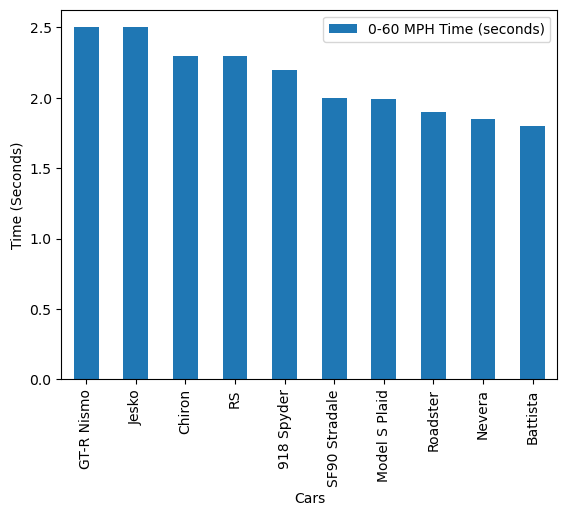

In [74]:
top_ten_fastest_cars.plot.bar(y =['0-60 MPH Time (seconds)'], ylabel = 'Time (Seconds)', xlabel = 'Cars')

**Plot a histogram of engine sizes in the dataset, binning to full liters**

In [ ]:
# Cutting engine size through bins of 1 to 10 with increment one (i.e. the integers/full litres in the range of the data) to create a new column
cars_2['EngineSizeCategory'] = pandas.cut(cars_2['Engine Size (L)'], range(1, 10), right = False)
# Using new column and value_counts method to find the number of entries that align to each engine size category
frequency_of_engine_size = cars_2.EngineSizeCategory.value_counts().sort_index()

# Plotting the frequency on bar chart/ histogram
frequency_of_engine_size.plot.bar(ylabel = 'Frequency', xlabel = 'Engine Size (Full Litres)', title = 'Frequency of Different Full Litre Engine Sizes', width = 1, edgecolor = 'black')

**Show the relation of Engine size vs Torque in a scatterplot**

In [ ]:
# Plotting scatter plot with independent variable as engine size and dependent variable as torque, with relevant labels
cars_2.plot.scatter(x = ['Engine Size (L)'], y = ['Torque (lb-ft)'], xlabel = 'Engine Size (L)', ylabel = 'Torque (lb-ft)', title = 'Engine Size vs Torque')
# As expected greater engine size equates to greater torque

**Make a table of all cars where the model starts with the letter 'A'**

In [ ]:
# Creating initial list
model_starts_with_A = []

# Iterating through entries to see what starts with A
for model in cars_2.index.unique():
    if model.startswith('A'):
        # Appending entries that start with A to list
        model_starts_with_A.append(model)

# Converting list into dataframe
model_starts_with_A_df = pandas.DataFrame({'Car Model': model_starts_with_A})
model_starts_with_A_df

**Plot the torque of each electric car in ascending order**

In [ ]:
# Assuming electric cars means that there is no engine size in litres
electric_cars = cars_2[cars_2['Engine Size (L)'].isna() == True]  
# Dropping duplicates so that graph only considers one entry for each model
electric_cars = electric_cars.loc[:, 'Torque (lb-ft)'].drop_duplicates()

# Since Roadster has an unknown torque it will not be included within this measurement
electric_cars = electric_cars.drop('Roadster')
# There is an error in the index of the two Taycan models (one represents a Taycan Turbo S and the other a Taycan 4S which is already listed and so it will be dropped)
# This was previously identified in inconsistency section but was not rectified due to the large dataframe; however, it can now be rectified due to a smaller dataframe, through 
# searching through entries, resetting the index and updating and dropping certain points along the dataframe. (Searching through dataframe was conducted outside of this code).

electric_cars = electric_cars.reset_index()
electric_cars.iloc[3, 0] = 'Taycan Turbo S'

# At position 4 was a Taycan entry with an error, hence it was dropped
electric_cars = electric_cars.drop(4)
# Resetting the index to car model for graphing purposes
electric_cars = electric_cars.set_index('Car Model')

# Sorting values in ascending order
electric_cars = electric_cars.sort_values('Torque (lb-ft)', ascending = True)

# Plotting scatterplot of Car Model and their torques with relevant titles
electric_cars.plot.bar(xlabel = 'Car Model', ylabel = 'Torque (lb-ft)', title = 'Torque of Electric Cars')